In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Libraries

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection

In [5]:
usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

C:\Users\Windows\AppData\Local\Temp\ipykernel_16884\1358373588.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')
[*********************100%***********************]  1 of 1 completed


In [6]:
type(usd_inr)

pandas.core.frame.DataFrame

In [7]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [8]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [9]:
usd_inr.reset_index(inplace=True)

In [10]:
usd_inr.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2,2024-01-15,83.160599,83.230797,82.809998,82.872101,0
3,2024-01-22,83.146103,83.222504,81.513702,83.124702,0
4,2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [11]:
# Keep only required columns
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns=['Date','USD_INR']

In [12]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


Dependent Variable y-Gold rate

In [14]:
gold_data_inr = yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

C:\Users\Windows\AppData\Local\Temp\ipykernel_16884\1347168845.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data_inr = yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


So here manually prepared the data

In [16]:
gold_dataset = pd.read_csv('Gold vs USDINR.csv')
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


Data Analysis

In [18]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [19]:
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

In [20]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


EDA
--Handle missing values - No
--Handle imbalanced dataset - No
--Handle outliers - Seen
--Encode categorical features - No
--Normalization vs Standardization - Standardize


<Axes: ylabel='USD_INR'>

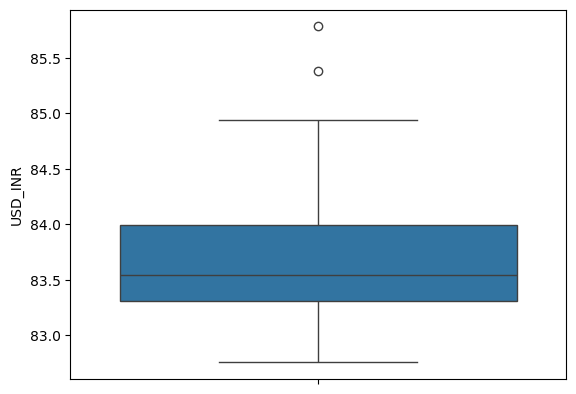

In [22]:
#To check presence of outlier here I am using Boxplot
sns.boxplot(gold_dataset['USD_INR'])

In [23]:
gold_dataset['USD_INR'].min()

82.75229645

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

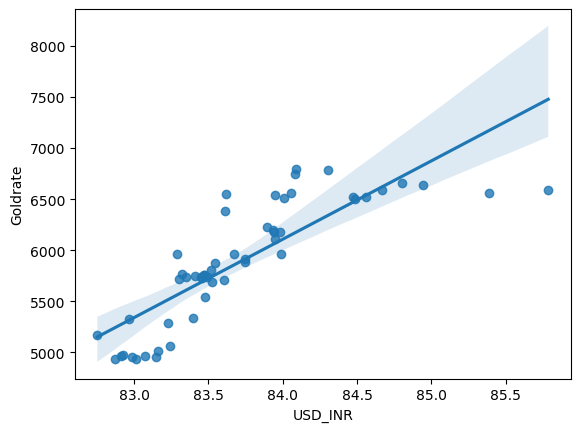

In [24]:
#current Linear Regression
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

Model Training

In [26]:
X = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]

In [27]:
X

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597
5,82.985298
6,83.009598
7,82.872299
8,82.910400
9,82.752296


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [29]:
X_train.shape, X_test.shape

((47, 1), (6, 1))

In [30]:
#now need to apply standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train) #Here fit will find maen and SD, when we give transform it will do Z Score. Basically fit will do the operations
X_test_scaled = scaler.transform(X_test)

In [32]:
X_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [34]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
regressor.coef_ 

array([[469.20755762]])

In [37]:
regressor.intercept_

array([5878.57340426])

In [38]:
#y=mx+b Need to find m and b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]
m,b

(469.2075576153299, 5878.573404255313)

In [39]:
X_train_predict = regressor.predict(X_train_scaled)

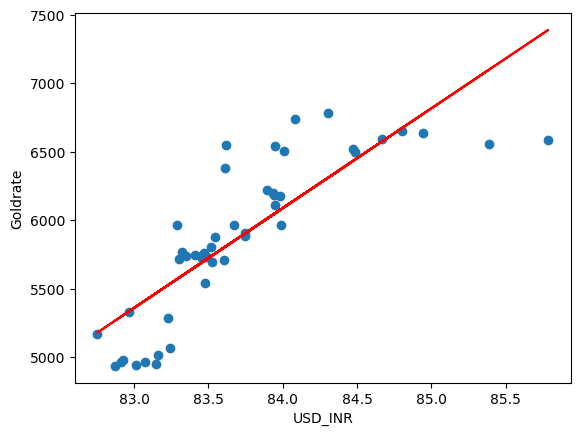

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train, X_train_predict, color='r')
plt.xlabel('USD_INR')
plt.ylabel('Goldrate')
plt.show()

In [41]:
X_test_predict = regressor.predict(X_test_scaled)
X_test_predict

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

In [42]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


Hyperparameter optimization

In [44]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)
search.fit(X_train_scaled, y_train)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [45]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [46]:
tuned_model = LinearRegression(positive=True, n_jobs=1, fit_intercept=True, copy_X=True)
tuned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [47]:
tuned_model.coef_

array([[469.20755762]])

In [48]:
tuned_model.intercept_

array([5878.57340426])

MLOPS
--Save the model
--Build_interface
--connect model and interface

In [92]:
import pickle

In [94]:
pickle.dump(regressor, open('regressor.pkl', 'wb'))
regressor_reloaded = pickle.load(open('regressor.pkl', 'rb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))